# MOVIE RECOMMENDATION SYSTEM

## TEAM MEMBERS

- Ayushi Dubey - 01601192022

- Azmeen Khatoon - 01701192022

- Bhumika Gupta - 01801192022

## PROJECT DESCRIPTION

The objective of this R project is to develop a movie recommendation system that leverages machine learning algorithms to provide personalized and accurate movie recommendations to users based on their preferences and viewing history. The system will analyze large movie datasets, encompassing various attributes such as genre, director, actors, ratings, and user reviews, to create a robust recommendation engine.

## DATASET USED

In order to build our recommendation system, we have used the MovieLens Dataset. This data consists of 105339 ratings applied over 10329 movies.

## IMPORTING NECESSARY LIBRARIES

In [1]:
install.packages("recommenderlab")
install.packages("ggplot2")
install.packages("data.table")
install.packages("reshape2")
install.packages("remotes")
remotes::install_version("rlang", version = "1.1.0")

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("recommenderlab"):
“installation of package ‘recommenderlab’ had non-zero exit status”
Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("data.table"):
“installation of package ‘data.table’ had non-zero exit status”
Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)


Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [2]:
packageVersion("rlang")

[1] ‘1.1.0’

In [3]:
library(recommenderlab)
library(rlang)
library(ggplot2)                       
library(data.table)
library(reshape2)

Loading required package: Matrix

Loading required package: arules


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy


Attaching package: ‘data.table’


The following object is masked from ‘package:rlang’:

    :=



Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




## RETRIEVING THE DATA

We retrieved the data from movies.csv into movie_data dataframe and rating.csv into rating_data.

In [2]:
setwd("/work/-20230531-083904")
movie_data <- read.csv("movies.csv",stringsAsFactors=FALSE)
rating_data <- read.csv("ratings.csv")
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [8]:
summary(movie_data)   

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        

In [3]:
head(movie_data)

,movieId,title,genres
,<int>,<chr>,<chr>
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
6,6,Heat (1995),Action|Crime|Thriller


In [4]:
summary(rating_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

In [5]:
head(rating_data)

,userId,movieId,rating,timestamp
,<int>,<int>,<dbl>,<int>
1,1,16,4.0,1217897793
2,1,24,1.5,1217895807
3,1,32,4.0,1217896246
4,1,47,4.0,1217896556
5,1,50,4.0,1217896523
6,1,110,4.0,1217896150


## DATA PREPROCESSING

Creating a one-hot encoding to create a matrix that comprises of corresponding genres for each of the films.

In [10]:
movie_genre <- as.data.frame(movie_data$genres, stringsAsFactors=FALSE)
library(data.table)
movie_genre2 <- as.data.frame(tstrsplit(movie_genre[,1], '[|]', 
                                   type.convert=TRUE), 
                         stringsAsFactors=FALSE) 
colnames(movie_genre2) <- c(1:10)

list_genre <- c("Action", "Adventure", "Animation", "Children", 
                "Comedy", "Crime","Documentary", "Drama", "Fantasy",
                "Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western")
genre_mat1 <- matrix(0,10330,18)
genre_mat1[1,] <- list_genre
colnames(genre_mat1) <- list_genre

for (index in 1:nrow(movie_genre2)) {
  for (col in 1:ncol(movie_genre2)) {
    gen_col = which(genre_mat1[1,] == movie_genre2[index,col])
    genre_mat1[index+1,gen_col] <- 1
}
}
genre_mat2 <- as.data.frame(genre_mat1[-1,], stringsAsFactors=FALSE) #remove first row, which was the genre list
for (col in 1:ncol(genre_mat2)) {
  genre_mat2[,col] <- as.integer(genre_mat2[,col]) #convert from characters to integers
} 
str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


### CREATING A SEARCH MATRIX

A Search matrix will allow us to perform an easy search of the films by specifying the genre present in our list.

In [11]:
SearchMatrix <- cbind(movie_data[,1:2], genre_mat2[])
head(SearchMatrix)  

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### CREATING A SPARSE MATRIX

We are creating a sparse matrix to save memory by only storing the non-zero elements and their corresponding indices. This allows us to perform computations and calculations more efficiently as we are dealing with a large dataset.

In [12]:
ratingMatrix <- dcast(rating_data, userId~movieId, value.var = "rating", na.rm=FALSE)
ratingMatrix <- as.matrix(ratingMatrix[,-1]) #remove userIds
#Convert rating matrix into a recommenderlab sparse matrix
ratingMatrix <- as(ratingMatrix, "realRatingMatrix")
ratingMatrix

668 x 10325 rating matrix of class ‘realRatingMatrix’ with 105339 ratings.

### OVERVIEWING SOME IMPORTANT PARAMETERS

Retrieving the available recommendation models that are suitable for the "realRatingMatrix" data type.

In [13]:
recommendation_model <- recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"

### EXTRACTING THE DESCRIPTION OF EACH RECOMMENDATION MODEL

Retrieving the available recommendation models for the "realRatingMatrix" data type and provide their names and descriptions for further analysis and selection of the appropriate model.

In [14]:
lapply(recommendation_model, "[[", "description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

### IMPLEMENTING ITEM BASED COLLABORATIVE FILTERING

By applying the IBCF model, the movie recommendation system can generate personalized recommendations by considering the similarities between movies and users' rating patterns.

We are obtaining the parameters of the IBCF model specific to the "realRatingMatrix" data type. 

In [15]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

## EXPLORING SIMILAR DATA

With the help of recommenderlab, we are computing similarities between users using  operator like cosine. The similarity matrix measures the similarity between users based on their ratings.

,1,2,3,4
1,NA,0.9880430,0.9820862,0.9957199
2,0.9880430,NA,0.9962866,0.9687126
3,0.9820862,0.9962866,NA,0.9944484
4,0.9957199,0.9687126,0.9944484,NA


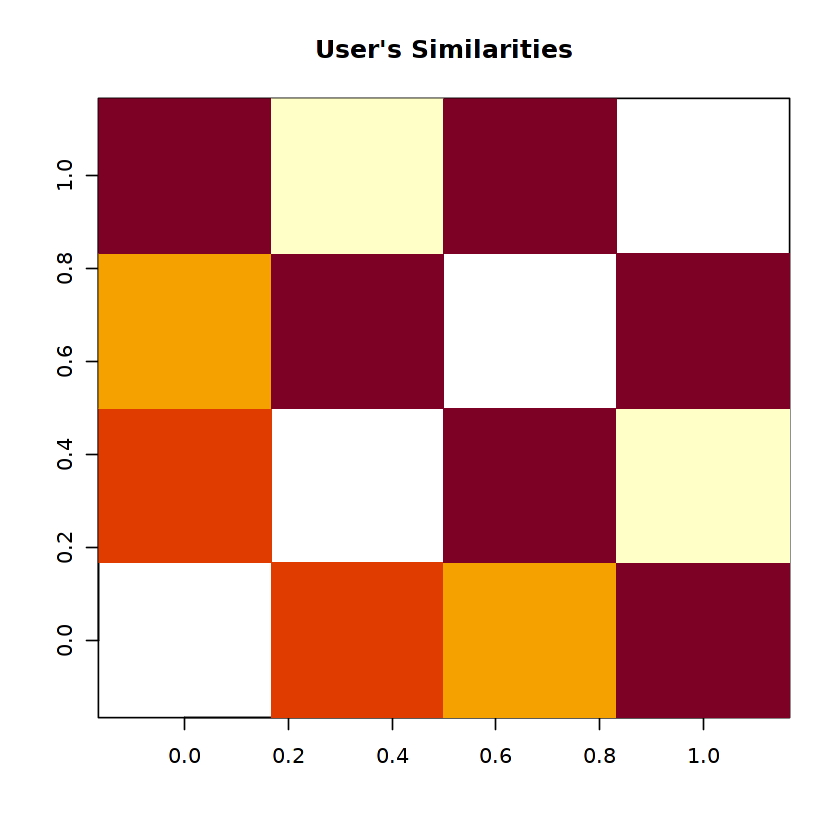

In [16]:
similarity_mat <- similarity(ratingMatrix[1:4, ],
                               method = "cosine",
                               which = "users")
as.matrix(similarity_mat)

image(as.matrix(similarity_mat), main = "User's Similarities")

### DELINEATING THE SIMILARITIES

It is displaying a heatmap of the movie similarities, where darker colors indicate higher similarity values between movies.

,1,2,3,4
1,NA,0.9834866,0.9779671,0.9550638
2,0.9834866,NA,0.9829378,0.9706208
3,0.9779671,0.9829378,NA,0.9932438
4,0.9550638,0.9706208,0.9932438,NA


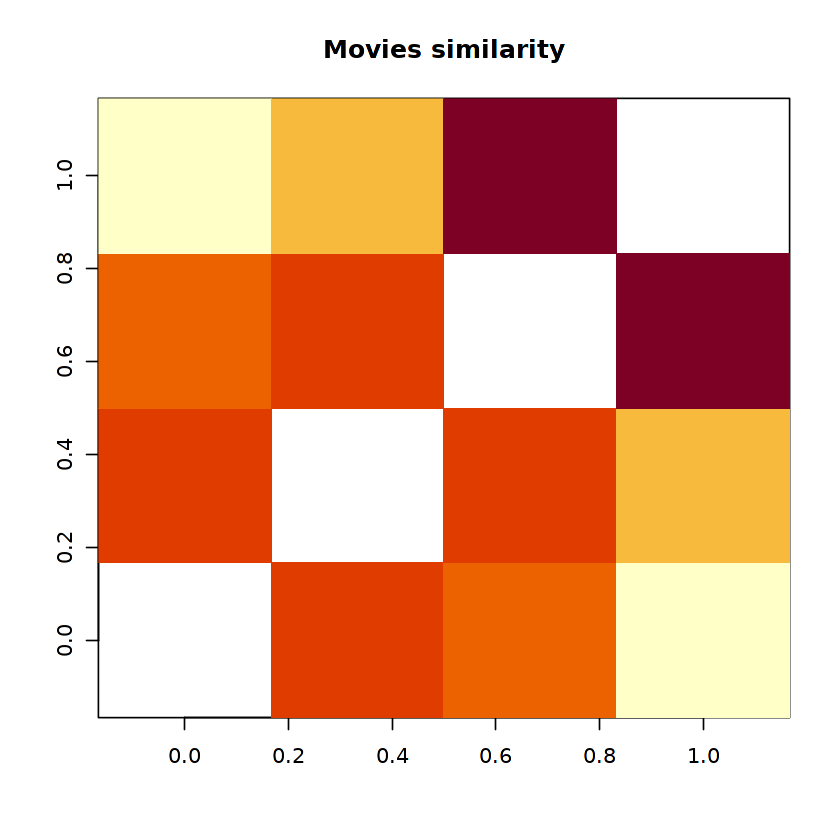

In [17]:
movie_similarity <- similarity(ratingMatrix[, 1:4], method =
                                 "cosine", which = "items")
as.matrix(movie_similarity)

image(as.matrix(movie_similarity), main = "Movies similarity")

### EXTRACTING THE MOST UNIQUE RATINGS

Creating a list of unique rating values present in the dataset.

In [18]:
rating_values <- as.vector(ratingMatrix@data)
unique(rating_values) # extracting unique ratings

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

Now, we will create a table of ratings that will display the most unique ratings.

In [19]:
Table_of_Ratings <- table(rating_values) # creating a count of movie ratings
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

## DATA VISUALIZATIONS

### TABLE OF MOST VIEWED MOVIES

We are creating a table (table_views) that displays the movies with the highest view counts, along with their titles, based on the information in ratingMatrix and movie_data.

In [20]:
library(ggplot2)
movie_views <- colCounts(ratingMatrix) # count views for each movie
table_views <- data.frame(movie = names(movie_views),
                          views = movie_views) # create dataframe of views
table_views <- table_views[order(table_views$views,
                                 decreasing = TRUE), ] # sort by number of views
table_views$title <- NA
for (index in 1:10325){
  table_views[index,3] <- as.character(subset(movie_data,
                                         movie_data$movieId == table_views[index,1])$title)
}
table_views[1:6,]

,movie,views,title
,<chr>,<int>,<chr>
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


### BAR PLOT FOR TOTAL VIEWS OF TOP FILMS

Generating a bar plot that visualizes the total views for the top films, with movie titles displayed on the x-axis and view counts represented by the heights of the bars. 

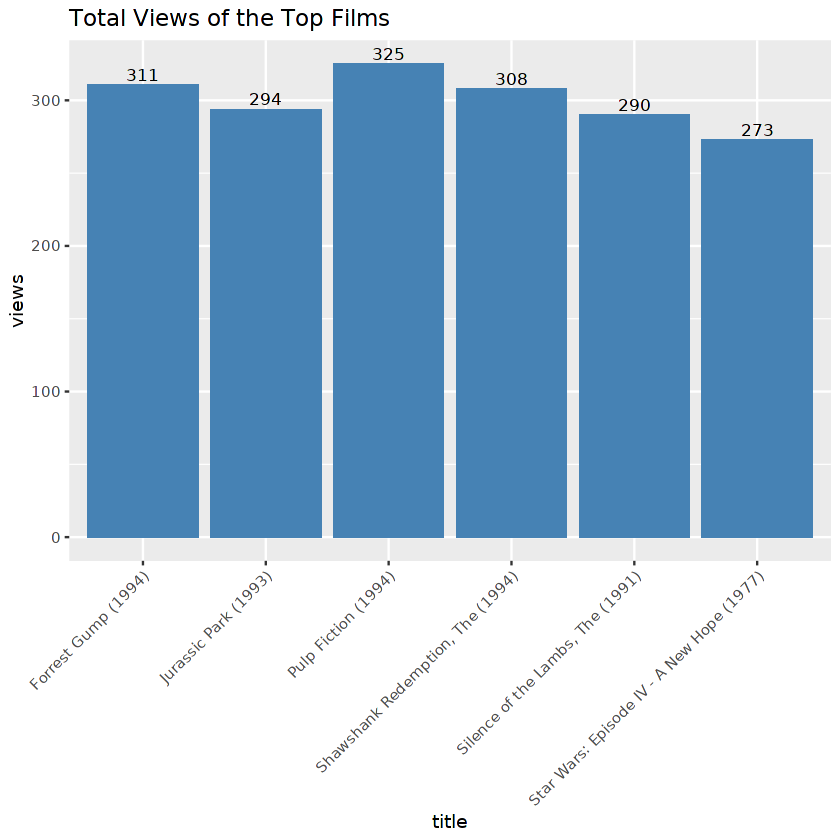

In [21]:
ggplot(table_views[1:6, ], aes(x = title, y = views)) +
  geom_bar(stat="identity", fill = 'steelblue') +
  geom_text(aes(label=views), vjust=-0.3, size=3.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +

  ggtitle("Total Views of the Top Films")

From the above bar-plot, we observe that Pulp Fiction is the most-watched film followed by Forrest Gump.

### HEATMAP OF MOVIE RATINGS

We are obtaining the heatmap of the specified subset of the ratingMatrix.

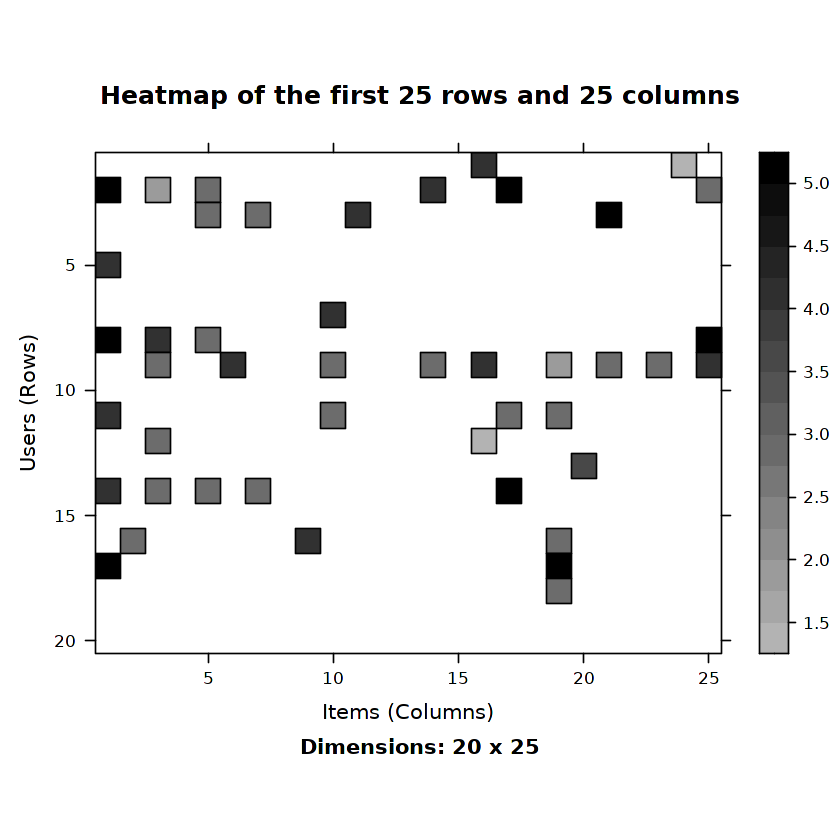

In [22]:
image(ratingMatrix[1:20, 1:25], axes = FALSE, main = "Heatmap of the first 25 rows and 25 columns")

## PERFORMING DATA PREPARATION

We will conduct data preparation in the following three steps –

- Selecting useful data

- Normalizing data

- Binarizing the data

### SELECTING USEFUL DATA

We are creating the filtered version of the "ratingMatrix" that includes movies and users with more than 50 ratings.

In [24]:
movie_ratings <- ratingMatrix[rowCounts(ratingMatrix) > 50,
                             colCounts(ratingMatrix) > 50]
movie_ratings

420 x 447 rating matrix of class ‘realRatingMatrix’ with 38341 ratings.

"movie_ratings" matrix is created by filtering out the movies and users that have fewer ratings than the calculated thresholds. 

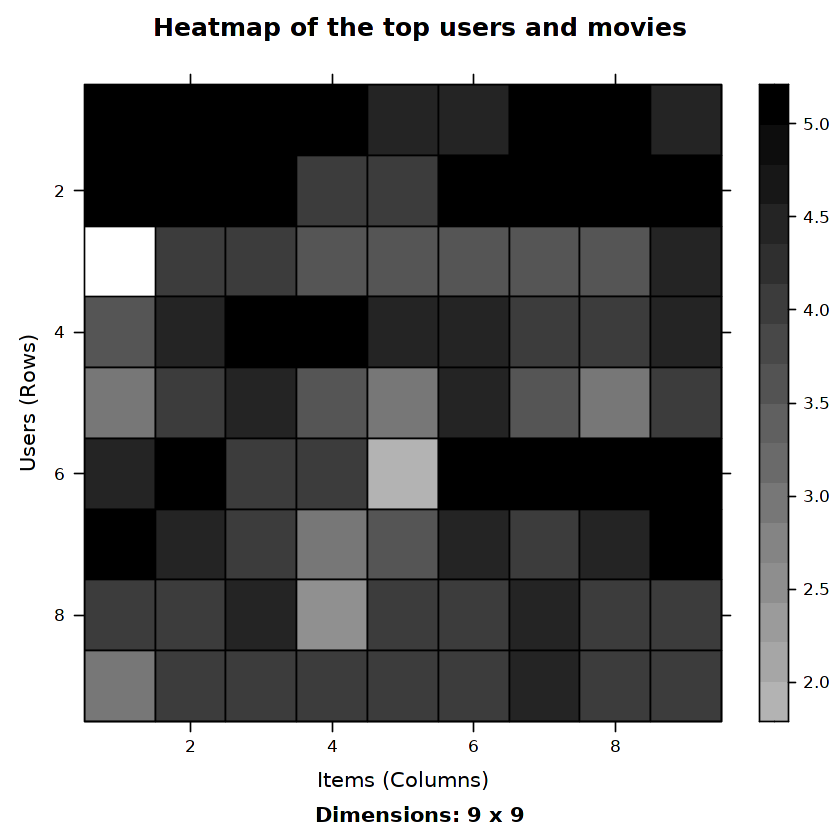

In [25]:
minimum_movies<- quantile(rowCounts(movie_ratings), 0.98)
minimum_users <- quantile(colCounts(movie_ratings), 0.98)
image(movie_ratings[rowCounts(movie_ratings) > minimum_movies,
                     colCounts(movie_ratings) > minimum_users],
main = "Heatmap of the top users and movies")

### VISUALIZING THE DISTRIBUTION OF AVERAGE RATINGS PER USER

Generating a plot showing the distribution of the average rating per user.

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


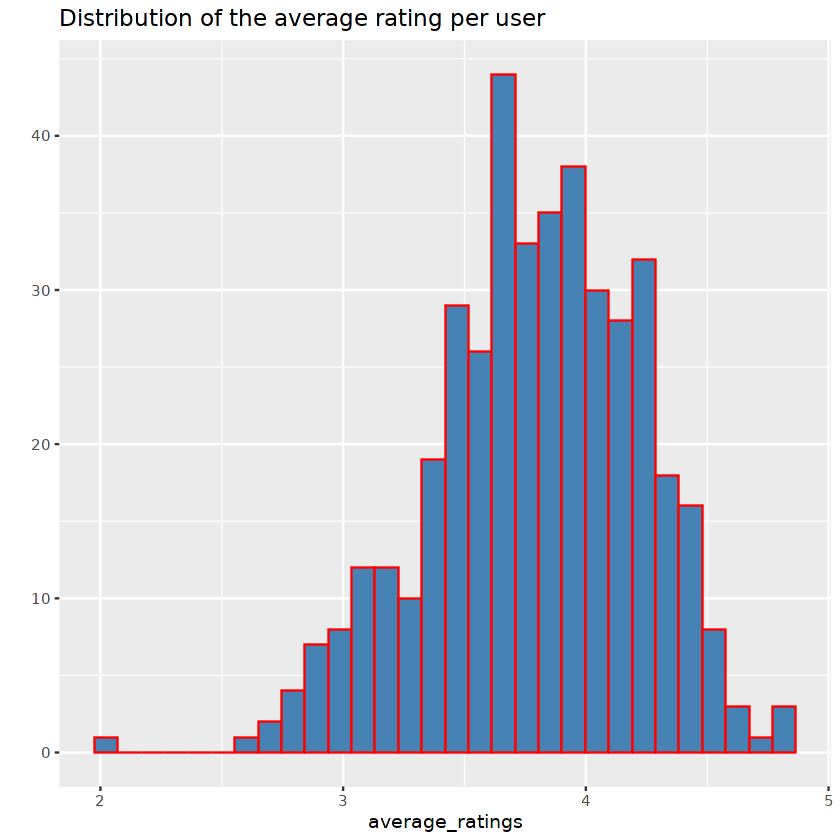

In [26]:
average_ratings <- rowMeans(movie_ratings)
qplot(average_ratings, fill=I("steelblue"), col=I("red")) +
  ggtitle("Distribution of the average rating per user")

### DATA NORMALIZATION

Creating heatmap of the normalized ratings for the top users.

[1] 0

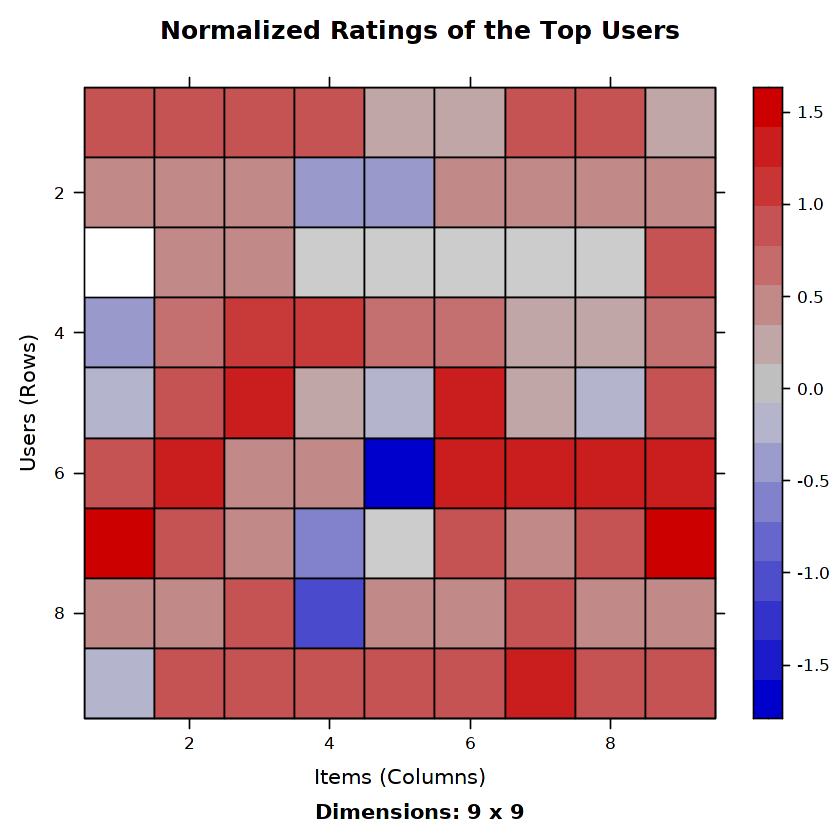

In [27]:
normalized_ratings <- normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)

image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies,
                          colCounts(normalized_ratings) > minimum_users],
main = "Normalized Ratings of the Top Users")

### DATA BINARIZATION

We will define a matrix that will consist of 1 if the rating is above 3 and otherwise it will be 0. Then, We will generate a heatmap visualization of the top users and movies based on the binary ratings in the good_rated_films matrix. 

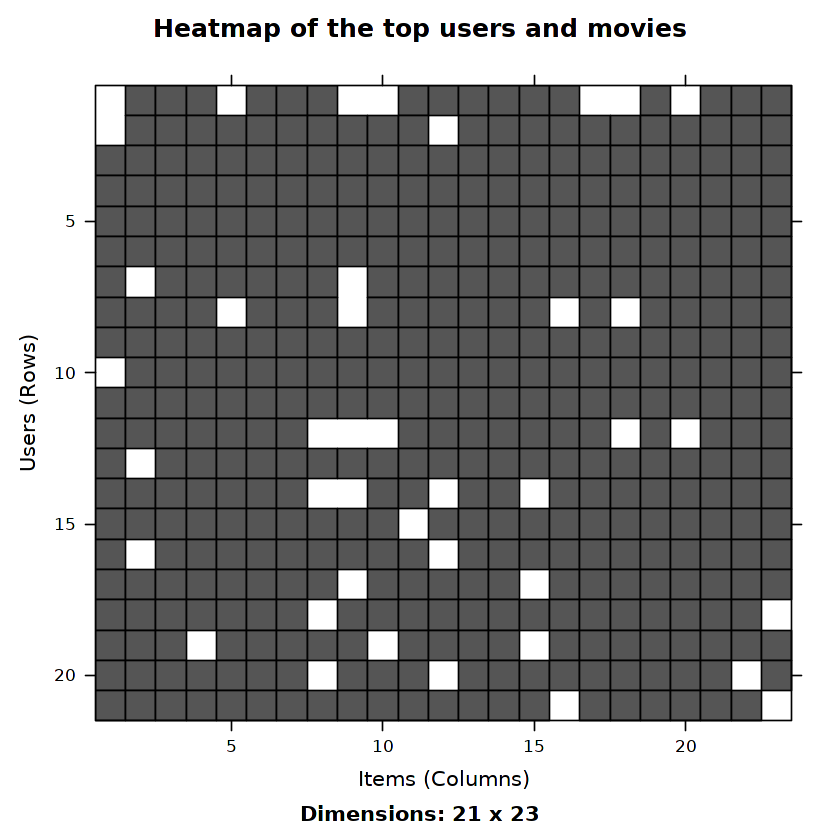

In [28]:
binary_minimum_movies <- quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users <- quantile(colCounts(movie_ratings), 0.95)
#movies_watched <- binarize(movie_ratings, minRating = 1)

good_rated_films <- binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies,
colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

## COLLABORATIVE FILTERING SYSTEM

We are building the filtering system by splitting the dataset into 80% training set and 20% test set.

In [29]:
sampled_data<- sample(x = c(TRUE, FALSE),
                      size = nrow(movie_ratings),
                      replace = TRUE,
                      prob = c(0.8, 0.2))
training_data <- movie_ratings[sampled_data, ]
testing_data <- movie_ratings[!sampled_data, ]

### EXPLORING THE VARIOUS PARAMETERS

We are using the recommenderRegistry to access the available recommendation algorithms for the "realRatingMatrix" data type. Next, we access the parameters specific to the item-based collaborative filtering (IBCF) algorithm.

In [30]:
recommendation_system <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

### TRAINED RECOMMENDATION MODEL

In [31]:
recommen_model <- Recommender(data = training_data,
                          method = "IBCF",
                          parameter = list(k = 30))
recommen_model
class(recommen_model)

Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 335 users.

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

### VISUALIZING THE SIMILARITY BETWEEN THE CLASS AND THE SIMILARITY MATRIX

Generating a heatmap plot that visualizes the similarity matrix of the trained recommendation model.

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 447 447

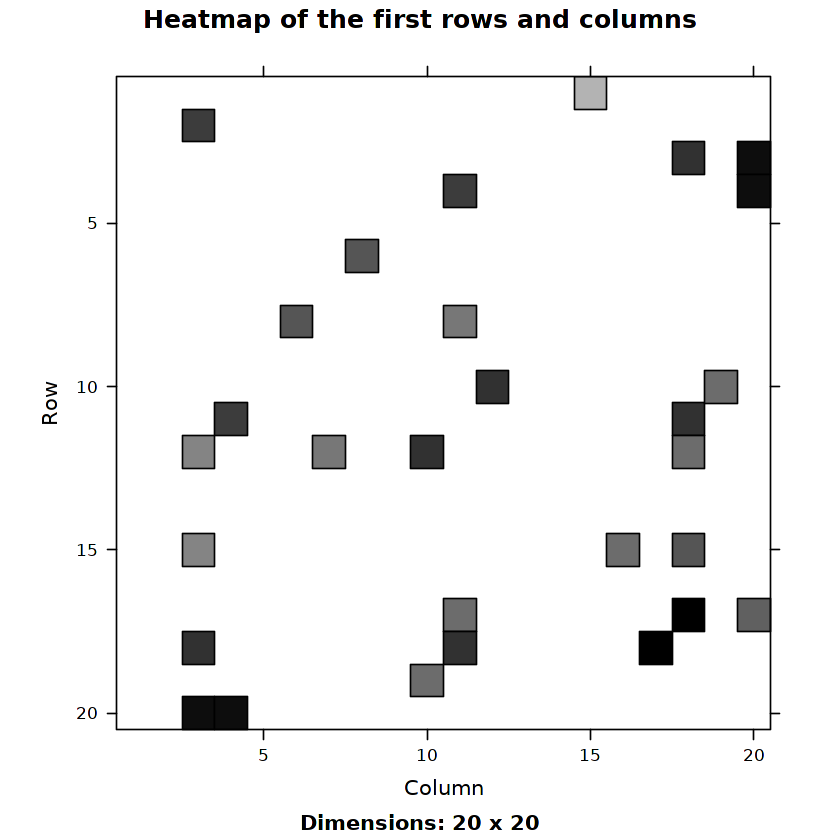

In [32]:
model_info <- getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items <- 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

### VISUALIZING THE SUM OF COLUMNS 

We are creating a histogram using the qplot() function to visualize the distribution of the column count.

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


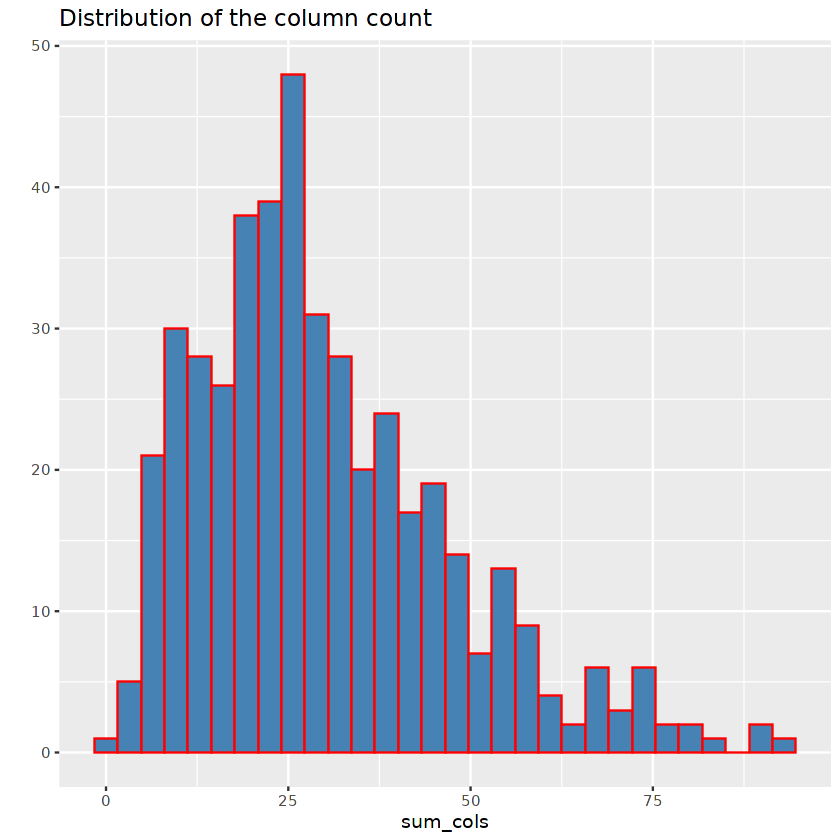

In [33]:
sum_rows <- rowSums(model_info$sim > 0)
table(sum_rows)

sum_cols <- colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("steelblue"), col=I("red"))+ ggtitle("Distribution of the column count")

After analyzing the similarities and distributions, we move on to generating recommendations. We then use the predict() function to predict recommendations for the testing data based on the trained model.

In [34]:
top_recommendations <- 10 # the number of items to recommend to each user
predicted_recommendations <- predict(object = recommen_model,
                          newdata = testing_data,
                          n = top_recommendations)
predicted_recommendations

Recommendations as ‘topNList’ with n = 10 for 85 users. 

We extract the predicted recommendations for the specific user. Then, we retrieve the corresponding movie titles for the recommended movie IDs.

In [35]:
user1 <- predicted_recommendations@items[[1]] # recommendation for the first user
movies_user1 <- predicted_recommendations@itemLabels[user1]
movies_user2 <- movies_user1
for (index in 1:10){
  movies_user2[index] <- as.character(subset(movie_data,
                                         movie_data$movieId == movies_user1[index])$title)
}
movies_user2

[1] "Heat (1995)"                                                                
 [2] "Get Shorty (1995)"                                                          
 [3] "Leaving Las Vegas (1995)"                                                   
 [4] "Mr. Holland's Opus (1995)"                                                  
 [5] "Schindler's List (1993)"                                                    
 [6] "Blade Runner (1982)"                                                        
 [7] "Tombstone (1993)"                                                           
 [8] "Silence of the Lambs, The (1991)"                                           
 [9] "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)"
[10] "North by Northwest (1959)"

We are extracting the subset of the matrix containing the first four columns, representing the recommendations for the first four users.

In [36]:
recommendation_matrix <- sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) }) # matrix with the recommendations for each user
#dim(recc_matrix)
recommendation_matrix[,1:4]

0,1,2,3
6,1234,1,3114
21,2997,5,4720
25,7438,7,1307
62,4973,16,2278
527,2019,17,953
541,1213,21,2028
553,111,25,920
593,594,34,8665
750,1183,36,3578
908,1196,62,1674


## SUMMARY

In this project, we developed a movie recommendation system using R and the Item-Based Collaborative Filtering (IBCF) approach. The system analyzes user ratings and similarities between movies to provide personalized movie recommendations. We conducted data preprocessing, including genre extraction and one-hot encoding, and transformed the rating data into a realRatingMatrix.

To evaluate the system, we performed exploratory data analysis, visualized movie popularity and rating distributions, and applied data normalization and binarization techniques. The recommendation model was trained on a training dataset and evaluated using a testing dataset. We then generated movie recommendations for users in the testing set and examined the distribution of recommended items.

Overall, this project showcases the implementation of a movie recommendation system that can help users discover movies based on their preferences and movie similarities.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dfc24930-65d0-4bdd-8b3d-6f78d78f9122' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>